In [9]:
import numpy as np
import matplotlib.pyplot as plt
import tables
import h5py
from scipy.spatial.distance import pdist, squareform
import os

In [167]:
import os
radius = 0.00
path = r'../result'
filenames=os.listdir(path)
radius = np.arange(12,-12.2,-0.2)
data = []

E_total = []
x_total = []
y_total = []
z_total = []
E_truth = []
x_truth = []
y_truth = []
z_truth = []
for index,i in enumerate(radius):
    filenames = os.listdir(path)
    for j in filenames:
        #print('%+.2f' % i)
        if ('%+.2f' % i) in j:
            #print(os.path.join(path, j))
            h = tables.open_file(os.path.join(path, j),'r')
            recondata = h.root.Recon
            E = recondata[:]['E_sph']
            taud = recondata[:]['tau_d']
            x = recondata[:]['x_sph']
            xt = recondata[:]['x_truth']
            y = recondata[:]['y_sph']
            yt = recondata[:]['y_truth']
            z = recondata[:]['z_sph']
            zt = recondata[:]['z_truth']
            xl = recondata[:]['x']
            h.close()
            E_total = np.hstack((E_total, E))
            x_total = np.hstack((x_total, x))
            y_total = np.hstack((y_total, y))
            z_total = np.hstack((z_total, z))
            x_truth = np.hstack((x_truth, np.zeros_like(x)))
            y_truth = np.hstack((y_truth, np.zeros_like(y)))
            z_truth = np.hstack((z_truth, radius[index]*np.ones_like(z)))

# Simulation
+ JSAP version: 547
+ Energy: 2 MeV
+ Geo: 5 kt
+ Simulation: (0,0,z): z from -12 to 12 m, step 0.2 m
+ 2k events per point

# Result by hit and time info

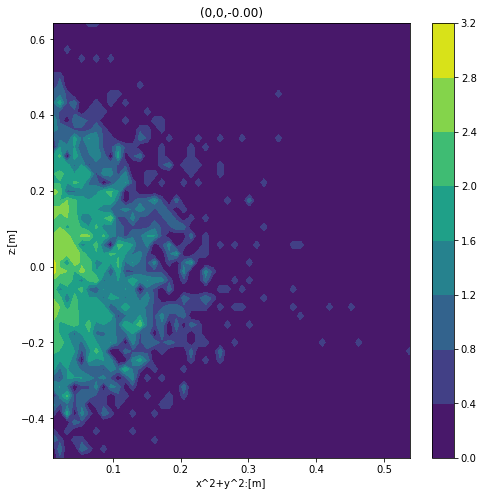

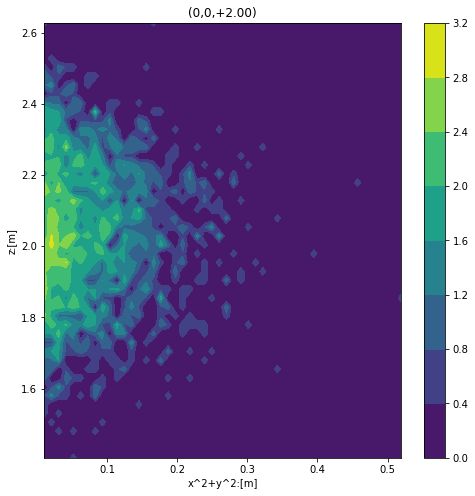

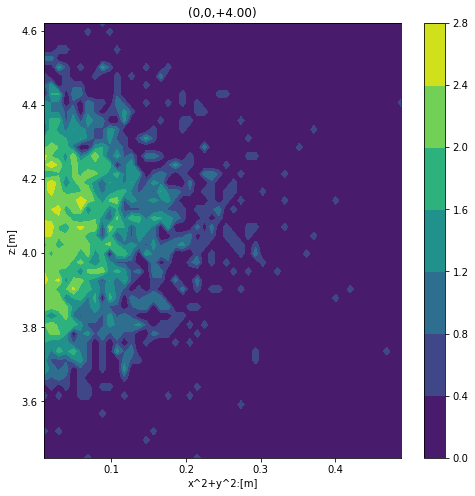

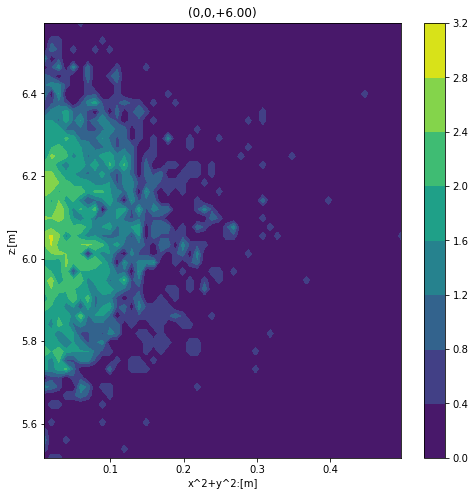

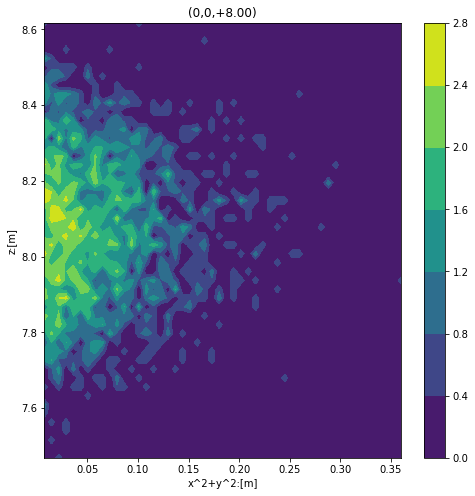

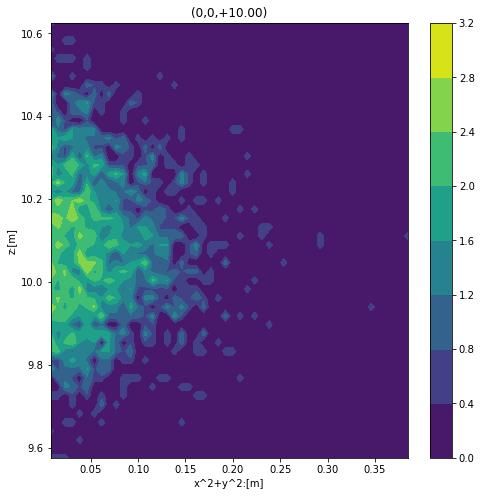

In [169]:
x_mean = []
y_mean = []
z_mean = []
x_std = []
y_std = []
z_std = []
for i in np.arange(-12,12.2,0.2):
    index = ((np.abs(z_truth-i)<0.1) & \
             ((np.array(x_total)**2+np.array(y_total)**2)<2) & \
            (~np.isnan(x_total)))
    if np.min(np.abs(i - np.arange(10,-2,-2)))<1e-3:
        plt.figure(figsize = (8,8))
        plt.subplot(1,1,1)
        r1 = x_total[index]**2 + y_total[index]**2
        H1, xedges, yedges = np.histogram2d(np.nan_to_num(r1), np.nan_to_num(z_total[index]), bins=50)
        X, Y = np.meshgrid(xedges[1:],yedges[1:])
        plt.contourf(X,Y,np.log(np.transpose(H1)+1))
        plt.xlabel('x^2+y^2:[m]')
        plt.ylabel('z:[m]')
        plt.colorbar()
        plt.title('(0,0,%+.2f)' % i)                   
        plt.savefig('%+.2f.png' % i)
    x_mean.append(np.mean(np.abs(x_total[index]-x_truth[index])))
    y_mean.append(np.mean(np.abs(y_total[index]-y_truth[index])))
    z_mean.append(np.mean(np.abs(z_total[index]-z_truth[index])))
    x_std.append(np.std(x_total[index]-x_truth[index]))
    y_std.append(np.std(y_total[index]-y_truth[index]))
    z_std.append(np.std(z_total[index]-z_truth[index]))

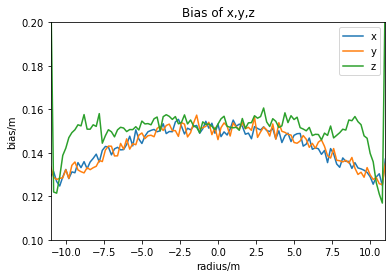

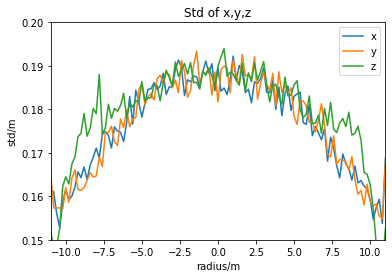

In [146]:
plt.plot(radius, x_mean)
plt.plot(radius, y_mean)
plt.plot(radius, z_mean)
plt.xlim([-11, 11])
plt.ylim([0.1, 0.2])
plt.legend(['x','y','z'])
plt.xlabel('radius/m')
plt.ylabel('bias/m')
plt.title('Bias of x,y,z')
plt.show()
plt.plot(radius, x_std)
plt.plot(radius, y_std)
plt.plot(radius, z_std)
plt.xlim([-11, 11])
plt.ylim([0.15, 0.2])
plt.legend(['x','y','z'])
plt.xlabel('radius/m')
plt.ylabel('std/m')
plt.title('Std of x,y,z')
plt.show()

# Result by hit

In [165]:
import os
radius = 0.00
path = r'../result_pe'
filenames=os.listdir(path)
radius = np.arange(12,-12.2,-0.2)
data = []

E_total = []
x_total = []
y_total = []
z_total = []
E_truth = []
x_truth = []
y_truth = []
z_truth = []
for index,i in enumerate(radius):
    filenames = os.listdir(path)
    for j in filenames:
        #print('%+.2f' % i)
        if ('%+.2f' % i) in j:
            #print(os.path.join(path, j))
            h = tables.open_file(os.path.join(path, j),'r')
            recondata = h.root.Recon
            E = recondata[:]['E_sph']
            taud = recondata[:]['tau_d']
            x = recondata[:]['x_sph']
            xt = recondata[:]['x_truth']
            y = recondata[:]['y_sph']
            yt = recondata[:]['y_truth']
            z = recondata[:]['z_sph']
            zt = recondata[:]['z_truth']
            xl = recondata[:]['x']
            h.close()
            E_total = np.hstack((E_total, E))
            x_total = np.hstack((x_total, x))
            y_total = np.hstack((y_total, y))
            z_total = np.hstack((z_total, z))
            x_truth = np.hstack((x_truth, np.zeros_like(x)))
            y_truth = np.hstack((y_truth, np.zeros_like(y)))
            z_truth = np.hstack((z_truth, radius[index]*np.ones_like(z)))

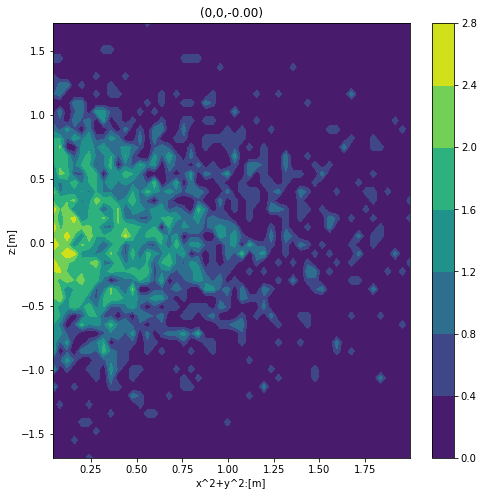

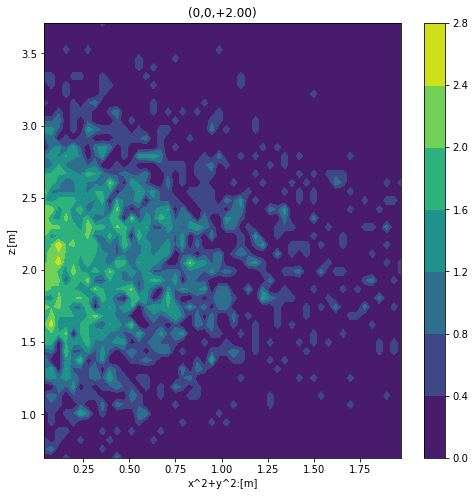

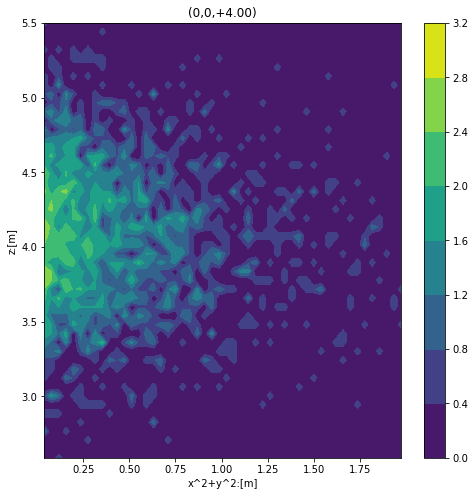

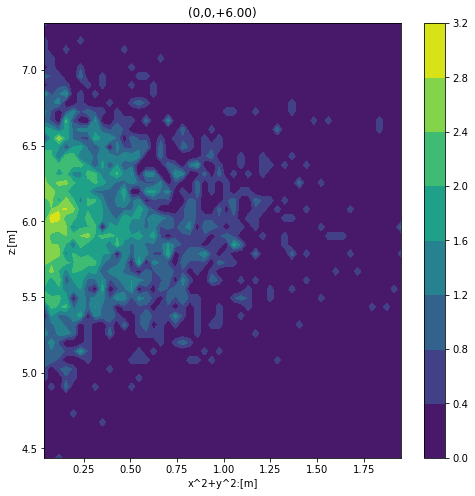

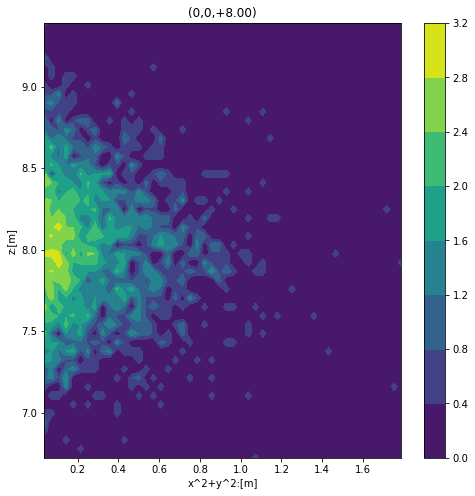

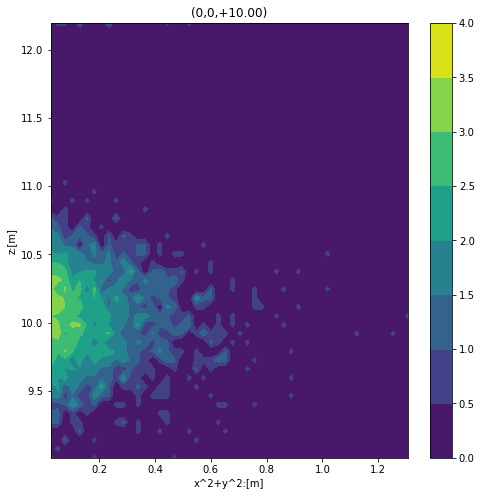

In [166]:
x_mean = []
y_mean = []
z_mean = []
x_std = []
y_std = []
z_std = []
for i in np.arange(-12,12.2,0.2):
    index = ((np.abs(z_truth-i)<0.1) & \
             ((np.array(x_total)**2+np.array(y_total)**2)<2) & \
            (~np.isnan(x_total)))
    if np.min(np.abs(i - np.arange(10,-2,-2)))<1e-3:
        plt.figure(figsize = (8,8))
        plt.subplot(1,1,1)
        r1 = x_total[index]**2 + y_total[index]**2
        H1, xedges, yedges = np.histogram2d(np.nan_to_num(r1), np.nan_to_num(z_total[index]), bins=50)
        X, Y = np.meshgrid(xedges[1:],yedges[1:])
        plt.contourf(X,Y,np.log(np.transpose(H1)+1))
        plt.xlabel('x^2+y^2:[m]')
        plt.ylabel('z:[m]')
        plt.colorbar()
        plt.title('(0,0,%+.2f)' % i)          
        plt.savefig('%+.2f.png' % i)
    x_mean.append(np.mean(np.abs(x_total[index]-x_truth[index])))
    y_mean.append(np.mean(np.abs(y_total[index]-y_truth[index])))
    z_mean.append(np.mean(np.abs(z_total[index]-z_truth[index])))
    x_std.append(np.std(x_total[index]-x_truth[index]))
    y_std.append(np.std(y_total[index]-y_truth[index]))
    z_std.append(np.std(z_total[index]-z_truth[index]))

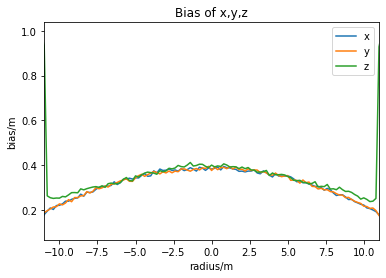

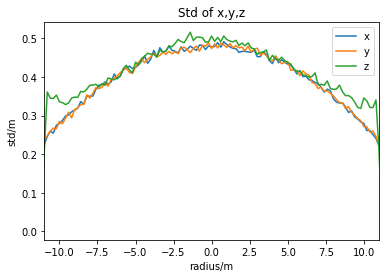

In [150]:
plt.plot(radius, x_mean)
plt.plot(radius, y_mean)
plt.plot(radius, z_mean)
plt.xlim([-11, 11])
plt.legend(['x','y','z'])
plt.xlabel('radius/m')
plt.ylabel('bias/m')
plt.title('Bias of x,y,z')
plt.show()
plt.plot(radius, x_std)
plt.plot(radius, y_std)
plt.plot(radius, z_std)
plt.xlim([-11, 11])
plt.legend(['x','y','z'])
plt.xlabel('radius/m')
plt.ylabel('std/m')
plt.title('Std of x,y,z')
plt.show()

# Result By Time

In [153]:
import os
radius = 0.00
path = r'../result_time_ft'
filenames=os.listdir(path)
radius = np.arange(12,-12.2,-0.2)
data = []

E_total = []
x_total = []
y_total = []
z_total = []
E_truth = []
x_truth = []
y_truth = []
z_truth = []
for index,i in enumerate(radius):
    filenames = os.listdir(path)
    for j in filenames:
        #print('%+.2f' % i)
        if ('%+.2f' % i) in j:
            #print(os.path.join(path, j))
            h = tables.open_file(os.path.join(path, j),'r')
            recondata = h.root.Recon
            E = recondata[:]['E_sph']
            taud = recondata[:]['tau_d']
            x = recondata[:]['x_sph']
            xt = recondata[:]['x_truth']
            y = recondata[:]['y_sph']
            yt = recondata[:]['y_truth']
            z = recondata[:]['z_sph']
            zt = recondata[:]['z_truth']
            xl = recondata[:]['x']
            h.close()
            E_total = np.hstack((E_total, E))
            x_total = np.hstack((x_total, x))
            y_total = np.hstack((y_total, y))
            z_total = np.hstack((z_total, z))
            x_truth = np.hstack((x_truth, np.zeros_like(x)))
            y_truth = np.hstack((y_truth, np.zeros_like(y)))
            z_truth = np.hstack((z_truth, radius[index]*np.ones_like(z)))

/opt/gentoo/usr/lib64/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in less
  # Remove the CWD from sys.path while we load stuff.


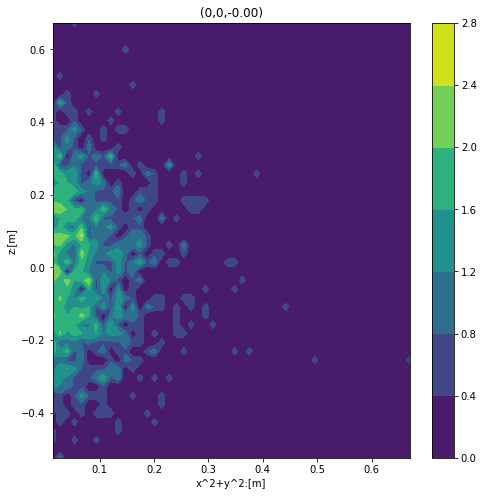

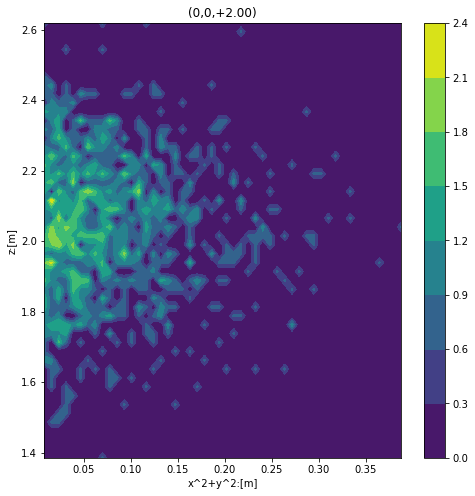

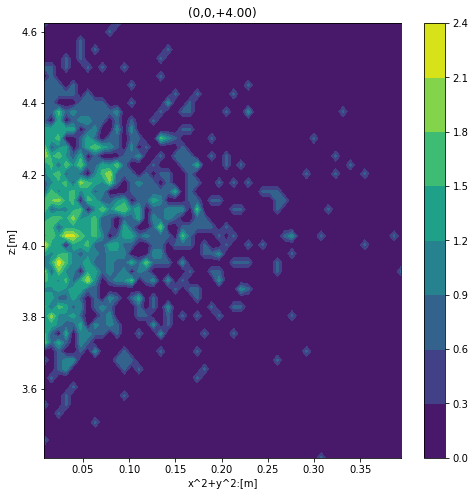

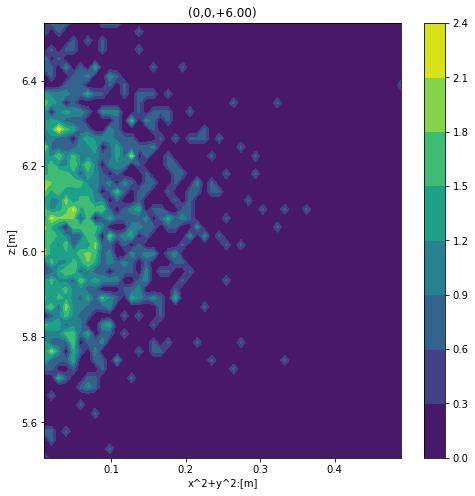

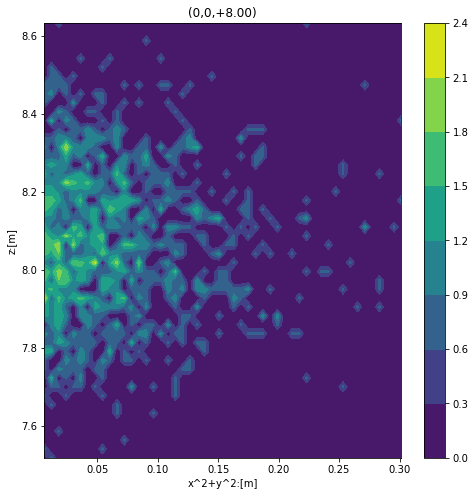

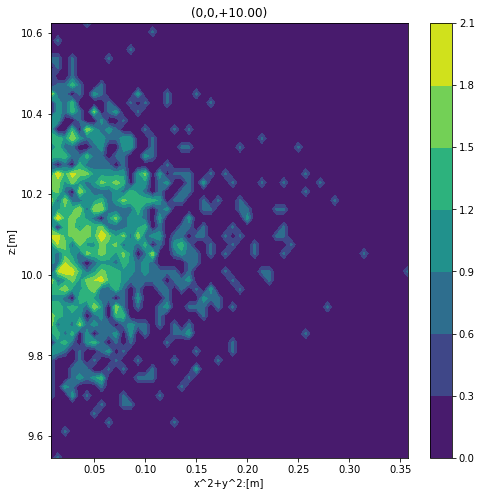

In [163]:
x_mean = []
y_mean = []
z_mean = []
x_std = []
y_std = []
z_std = []
for i in np.arange(-12,12.2,0.2):
    index = ((np.abs(z_truth-i)<0.1) & \
             ((np.array(x_total)**2+np.array(y_total)**2)<2) & \
             (np.abs(z_total) < 11) & \
            (~np.isnan(x_total)))
    if np.min(np.abs(i - np.arange(10,-2,-2)))<1e-3:
        plt.figure(figsize = (8,8))
        plt.subplot(1,1,1)
        r1 = x_total[index]**2 + y_total[index]**2
        H1, xedges, yedges = np.histogram2d(np.nan_to_num(r1), np.nan_to_num(z_total[index]), bins=50)
        X, Y = np.meshgrid(xedges[1:],yedges[1:])
        plt.contourf(X,Y,np.log(np.transpose(H1)+1))
        plt.xlabel('x^2+y^2:[m]')
        plt.ylabel('z:[m]')
        plt.colorbar()
        plt.title('(0,0,%+.2f)' % i)          
        plt.savefig('%+.2f.png' % i)
    x_mean.append(np.mean(np.abs(x_total[index]-x_truth[index])))
    y_mean.append(np.mean(np.abs(y_total[index]-y_truth[index])))
    z_mean.append(np.mean(np.abs(z_total[index]-z_truth[index])))
    x_std.append(np.std(x_total[index]-x_truth[index]))
    y_std.append(np.std(y_total[index]-y_truth[index]))
    z_std.append(np.std(z_total[index]-z_truth[index]))

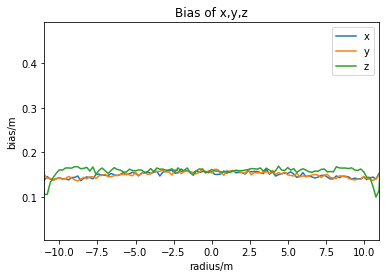

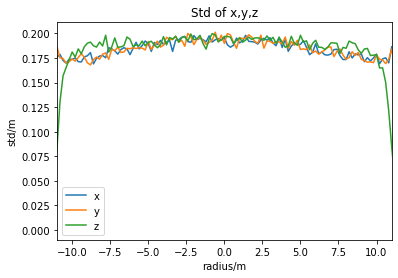

In [164]:
plt.plot(radius, x_mean)
plt.plot(radius, y_mean)
plt.plot(radius, z_mean)
plt.xlim([-11, 11])
plt.legend(['x','y','z'])
plt.xlabel('radius/m')
plt.ylabel('bias/m')
plt.title('Bias of x,y,z')
plt.show()
plt.plot(radius, x_std)
plt.plot(radius, y_std)
plt.plot(radius, z_std)
plt.xlim([-11, 11])
plt.legend(['x','y','z'])
plt.xlabel('radius/m')
plt.ylabel('std/m')
plt.title('Std of x,y,z')
plt.show()

# Conclusion  
+ Time improve much on resolution
+ In 5kt charge recon performs better than 1t

# Relationship between 5 kt and 1 t
If all photons are directly detected:
+ Legendre coefficient of *hit* should only differ by 0-th order
+ Legendre coefficient of *time* should be directly proportional 

#### Plan to choose
+ Use templates of 1 t and 5 kt individually
+ Use 5 kt templates smooth 1 t templates
+ Use 1 t templates without PMT response
+ Use 5 kt directly